In [13]:
import cv2 # tested with 3.1.0 version
import numpy as np
import matplotlib.pyplot as plt
import os
%matplotlib inline
%config InlineBackend.figure_format = 'retina'

# 2. Image Enhancement
## 2.1 Histogram

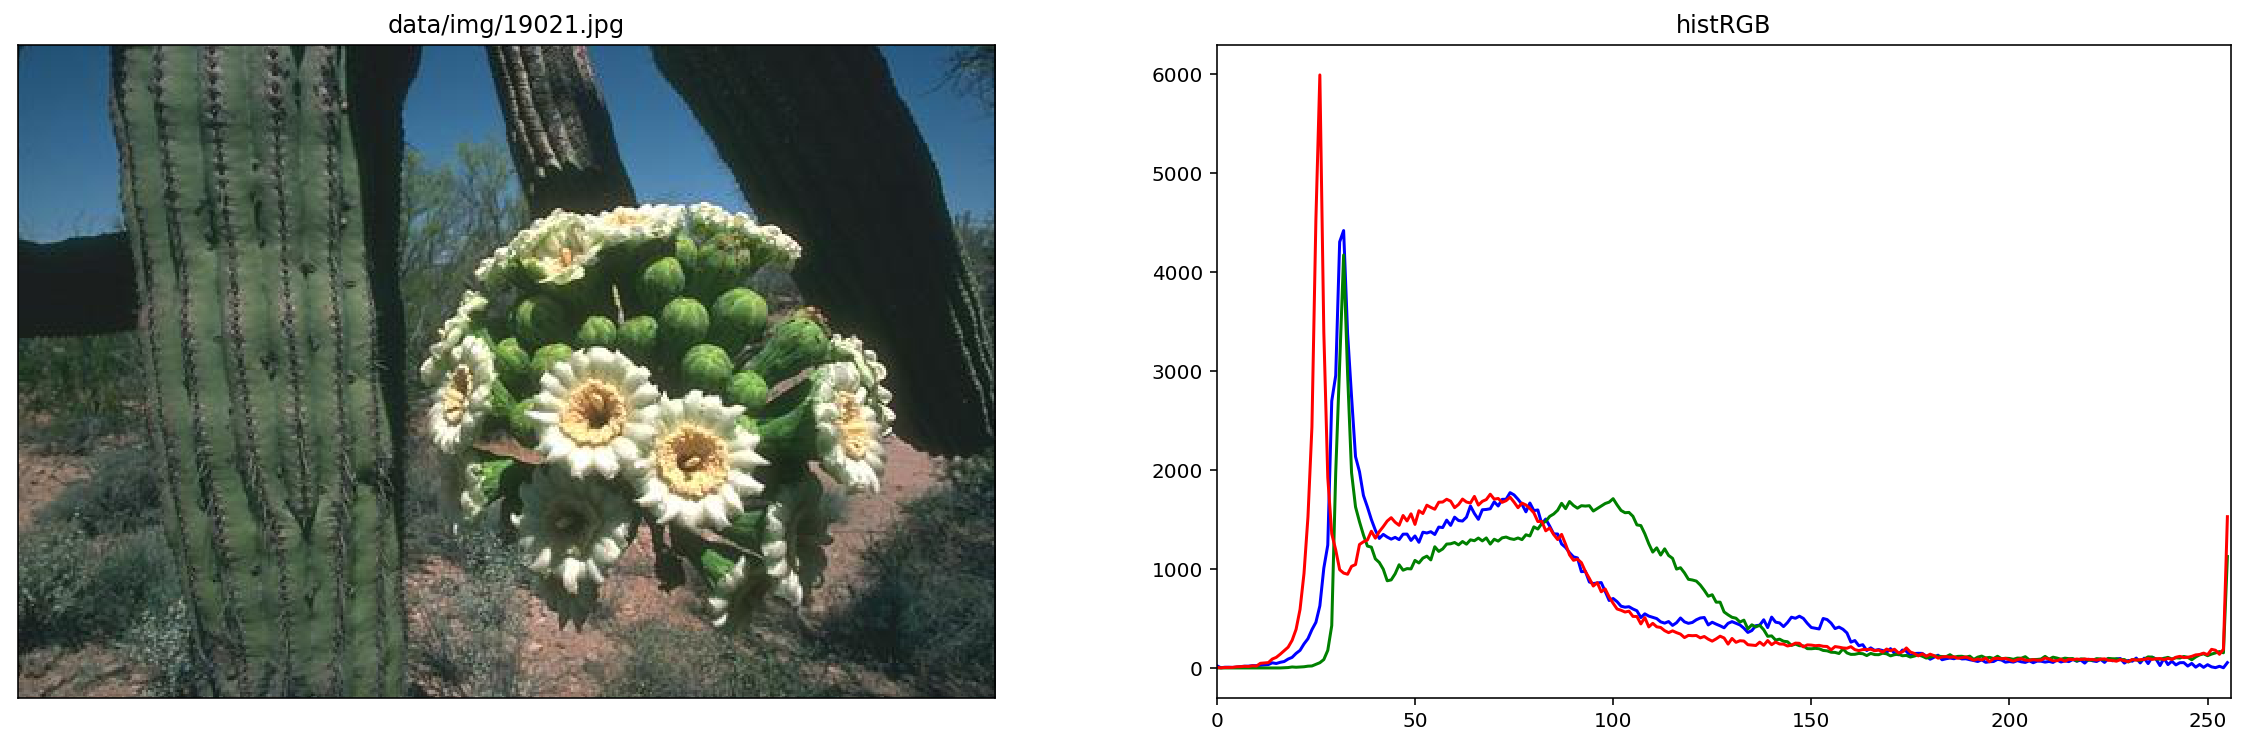

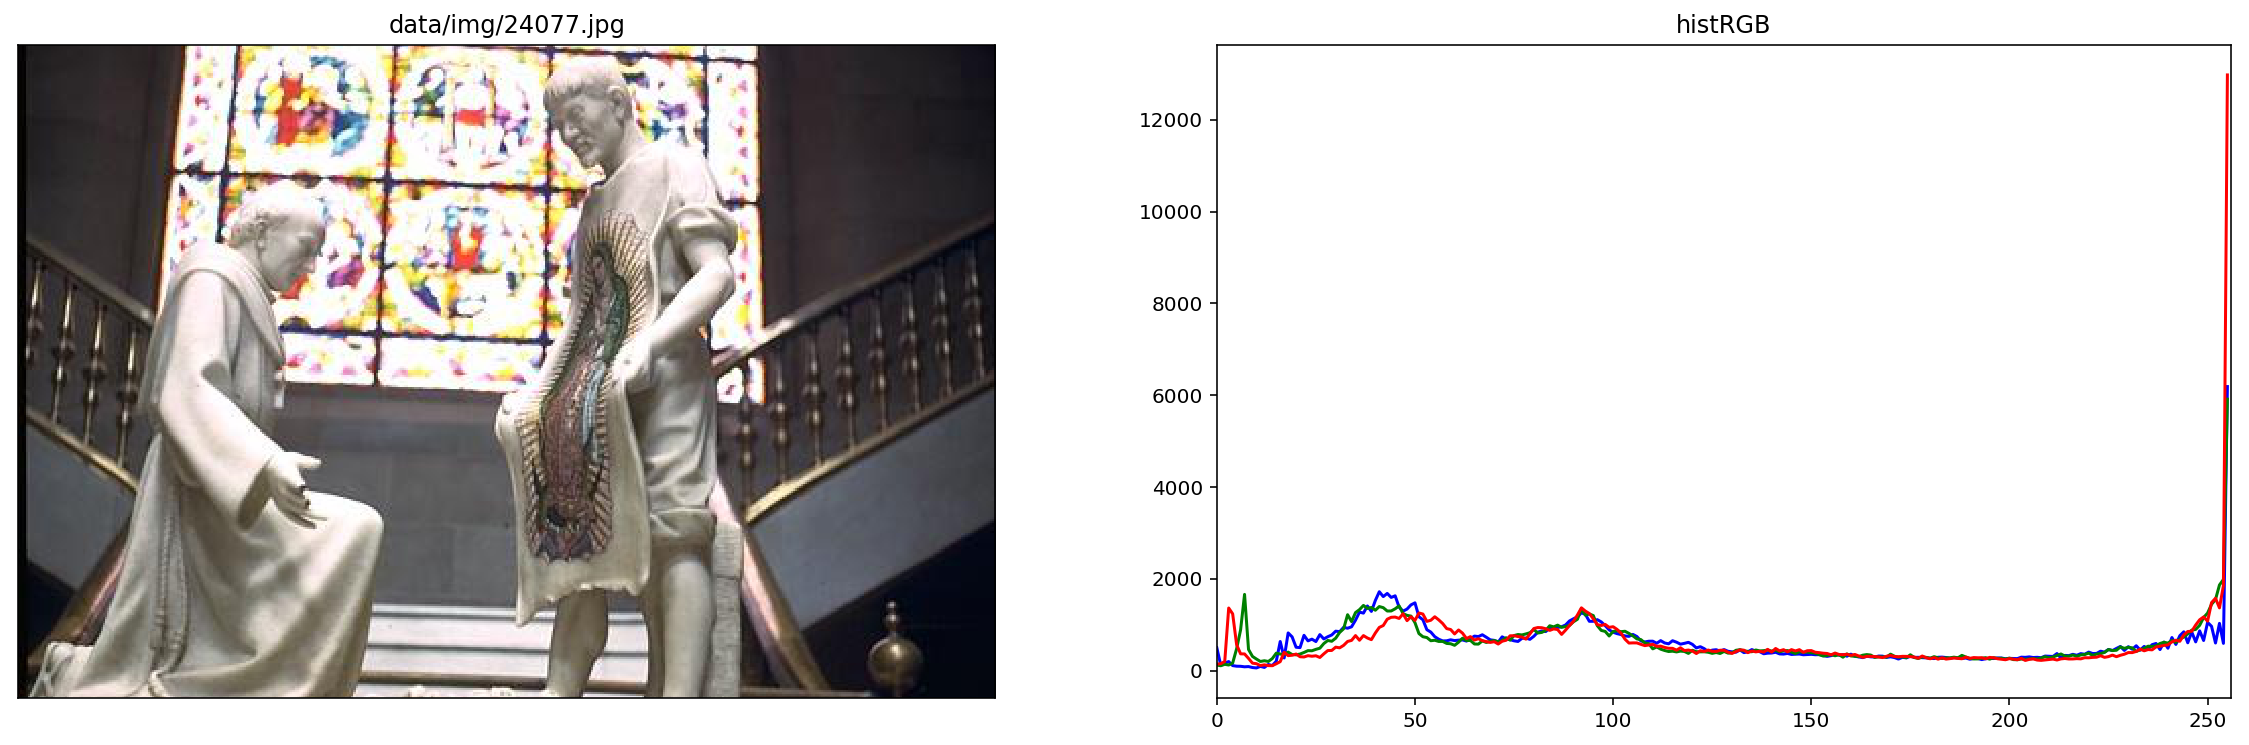

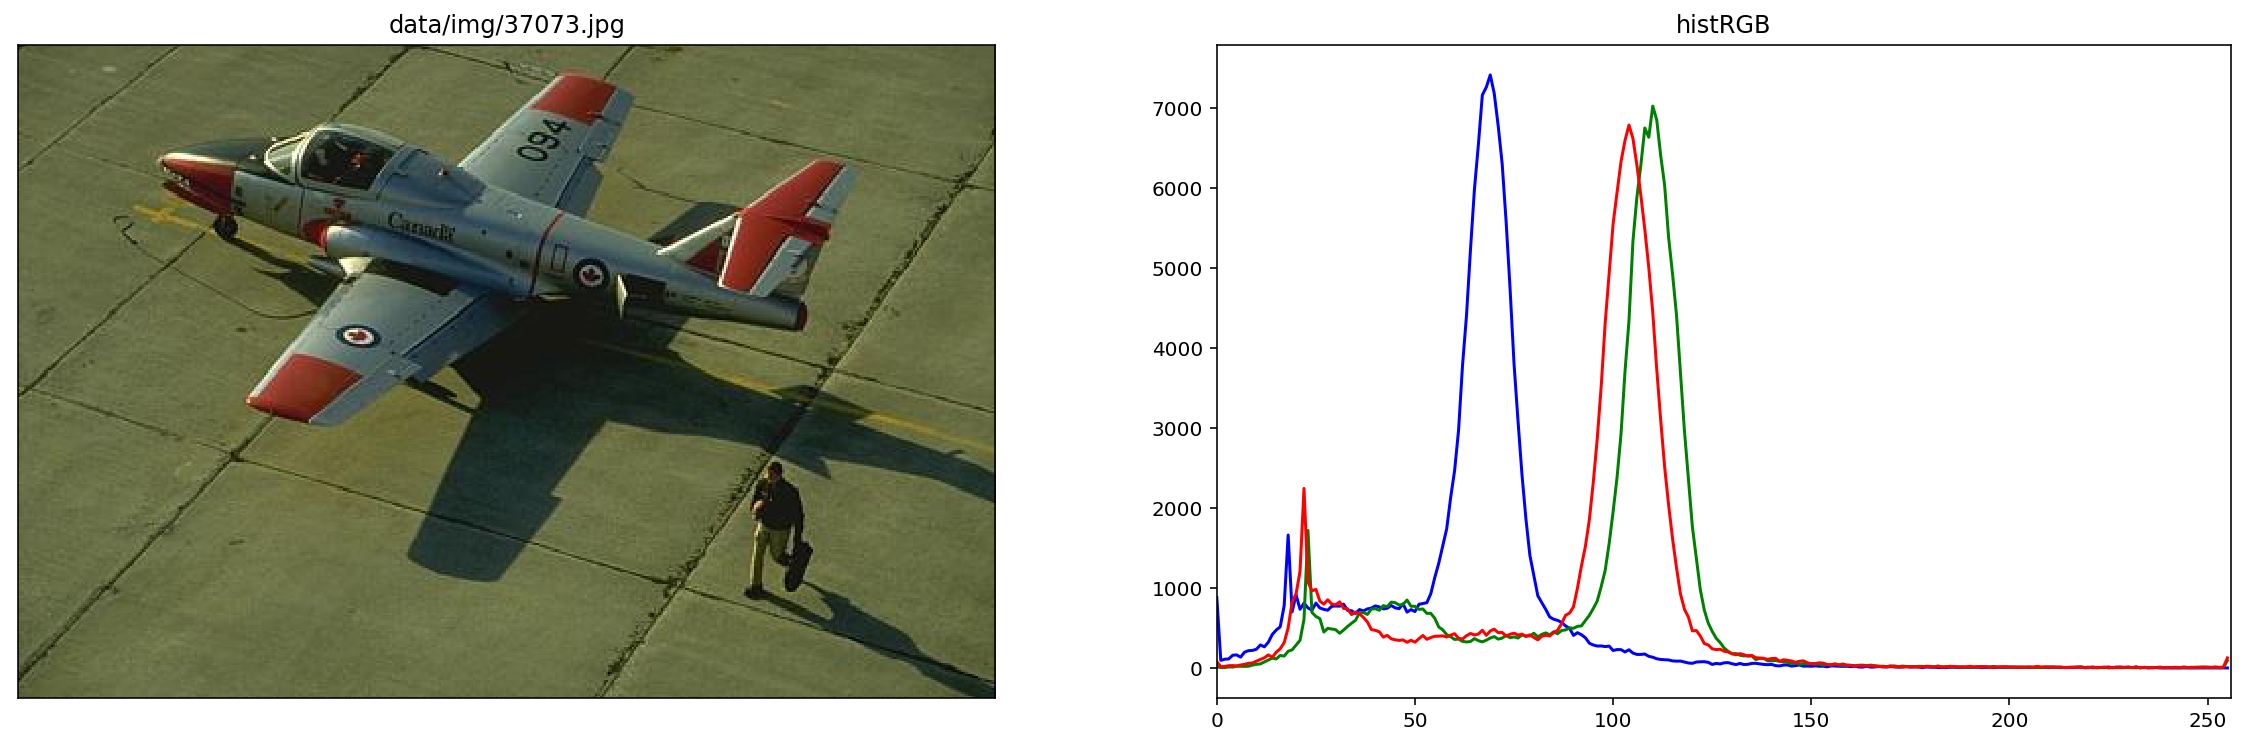

In [12]:
IMG_NAMES = ['19021.jpg', '24077.jpg','37073.jpg'] # Take any 3 images from the dataset in "data/img"

def show_histRGB(img, imagepath):
    color = ('b', 'g', 'r')
    plt.figure(figsize=(20, 6)) # Figure size can be adjusted.
    plt.subplot(121), plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB)) # show the corresponding rgb image using pyplot.
    plt.xticks([]), 
    plt.yticks([])
    plt.title(imagepath)
    for i, col in enumerate(color):
        # a) Calculate the histograms for this image.
        histr = cv2.calcHist([img],[i],None,[256],[0,256])
        plt.subplot(122), plt.plot(histr, color = col) # plot histogram with the b g r channels.
        plt.xlim([0, 256])
        plt.title("histRGB")
    plt.show()
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    img = cv2.imread(imagepath) # read the image from image path using opencv.
    show_histRGB(img, imagepath)

### b) What can you say about the spread of the color intensities for these images? (Please briefly answer this question in this block)

 - In the first image, we see that all three of the histograms have peaks in the low intensity range. This means that there is a lot of black color which we can see in the shadow. They also have a small peak in the end which shows presence of white as seen in the flowers. Green seems to have max variance followed by blue and then red. Green is used in plants and blue in the sky. Red has some pixels with mid range intensity values to take part in things like color of the ground etc. <br>
 - In the second image, we see that all the three colors have high peaks later in the end that symbolize a lot of white color which is clearly used in the statues and the stairs. There's a little of the three colors used in the background which is the reason there are some pixels with mid-intensity values. <br>
 - In the last image we can separately see red color on the plane, a greenish color on the ground and blue-ish color on the plane. The image is little dark so the curves are a little skewed towards the left. Early small peaks in the curves represent the shadow. 

## 2.2 Global Histogram Equalization

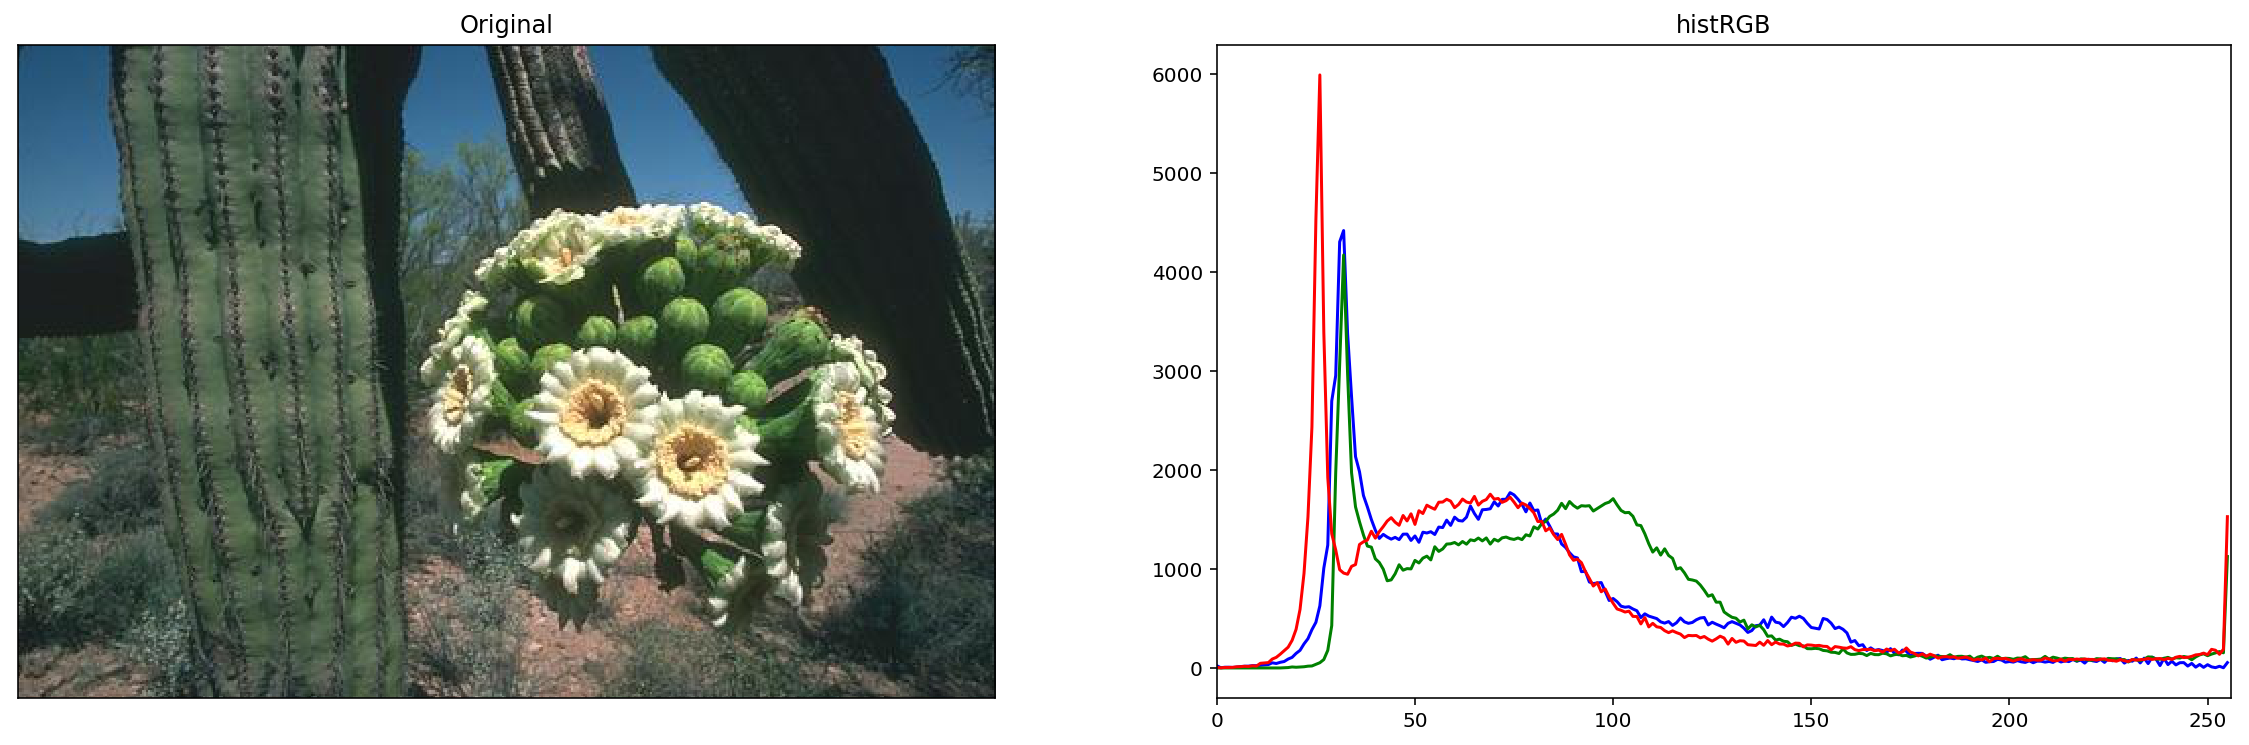

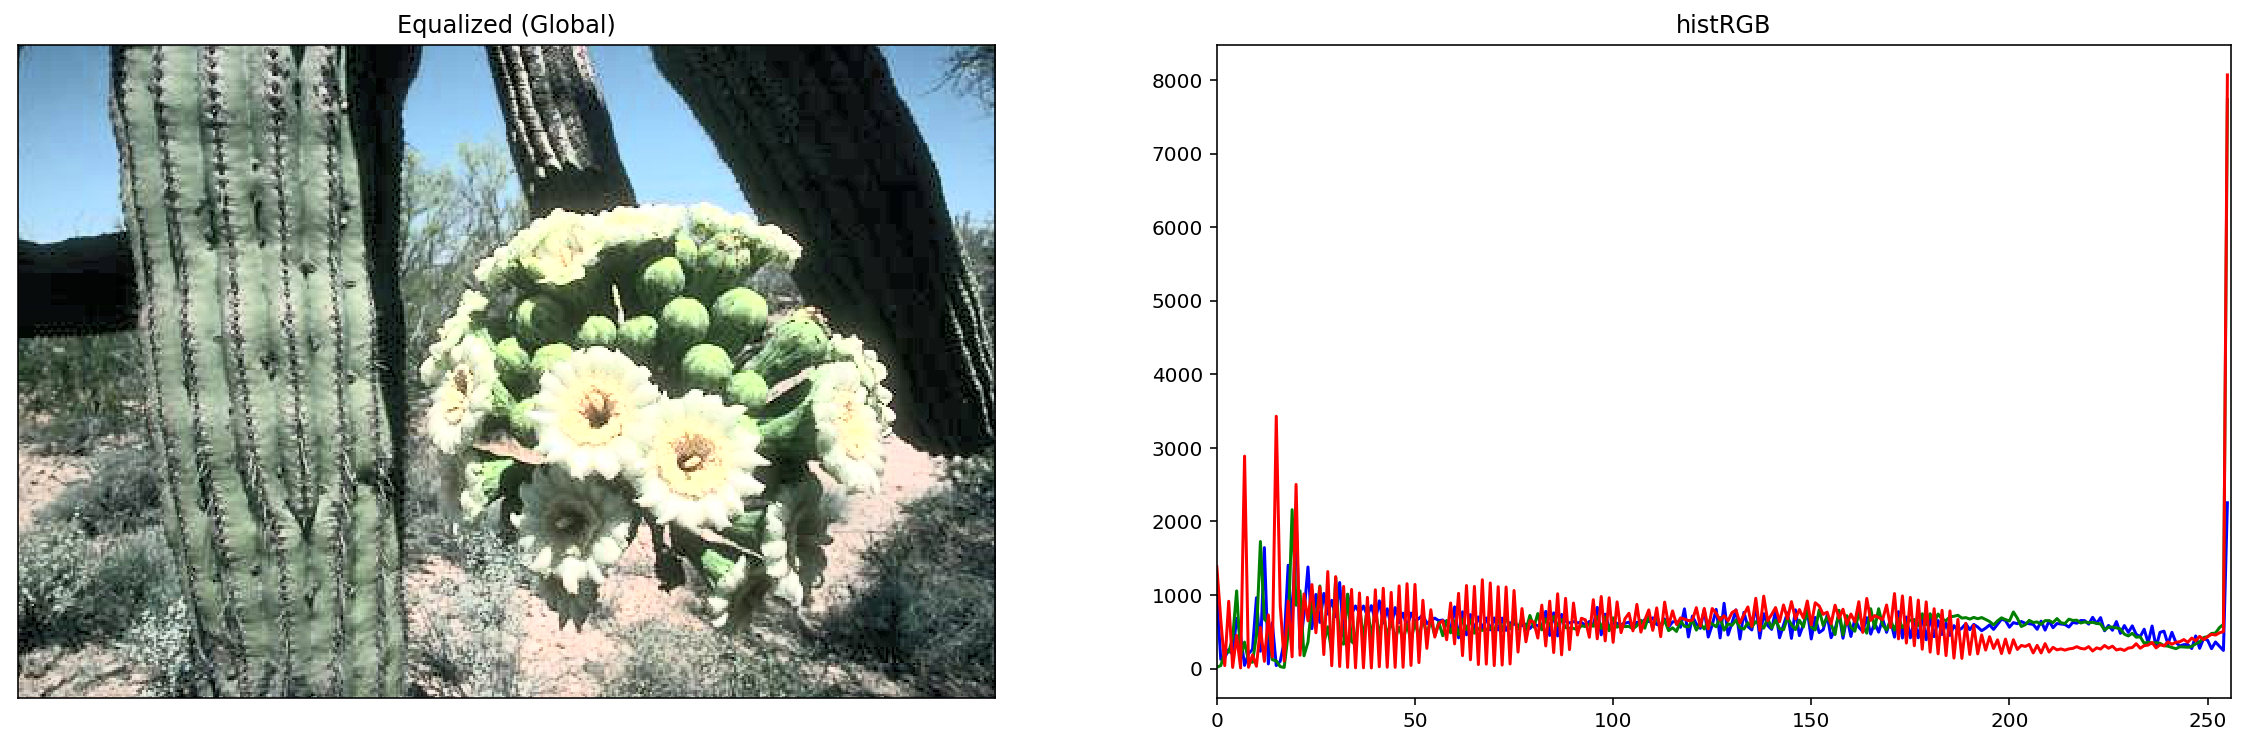

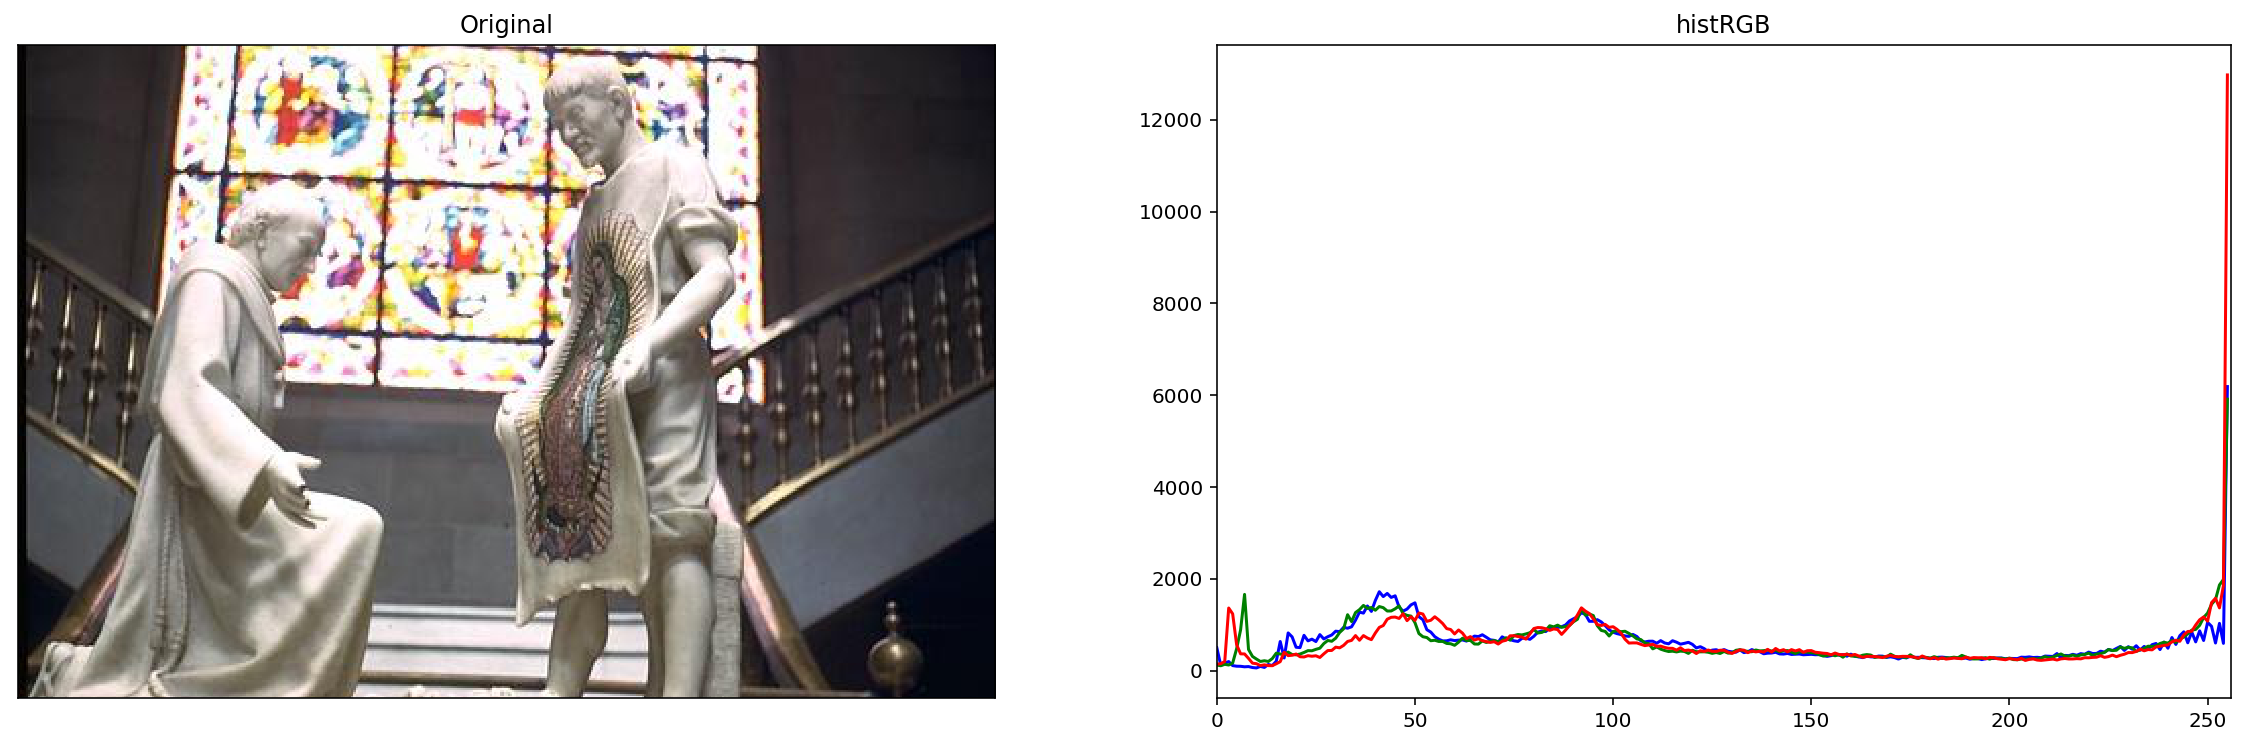

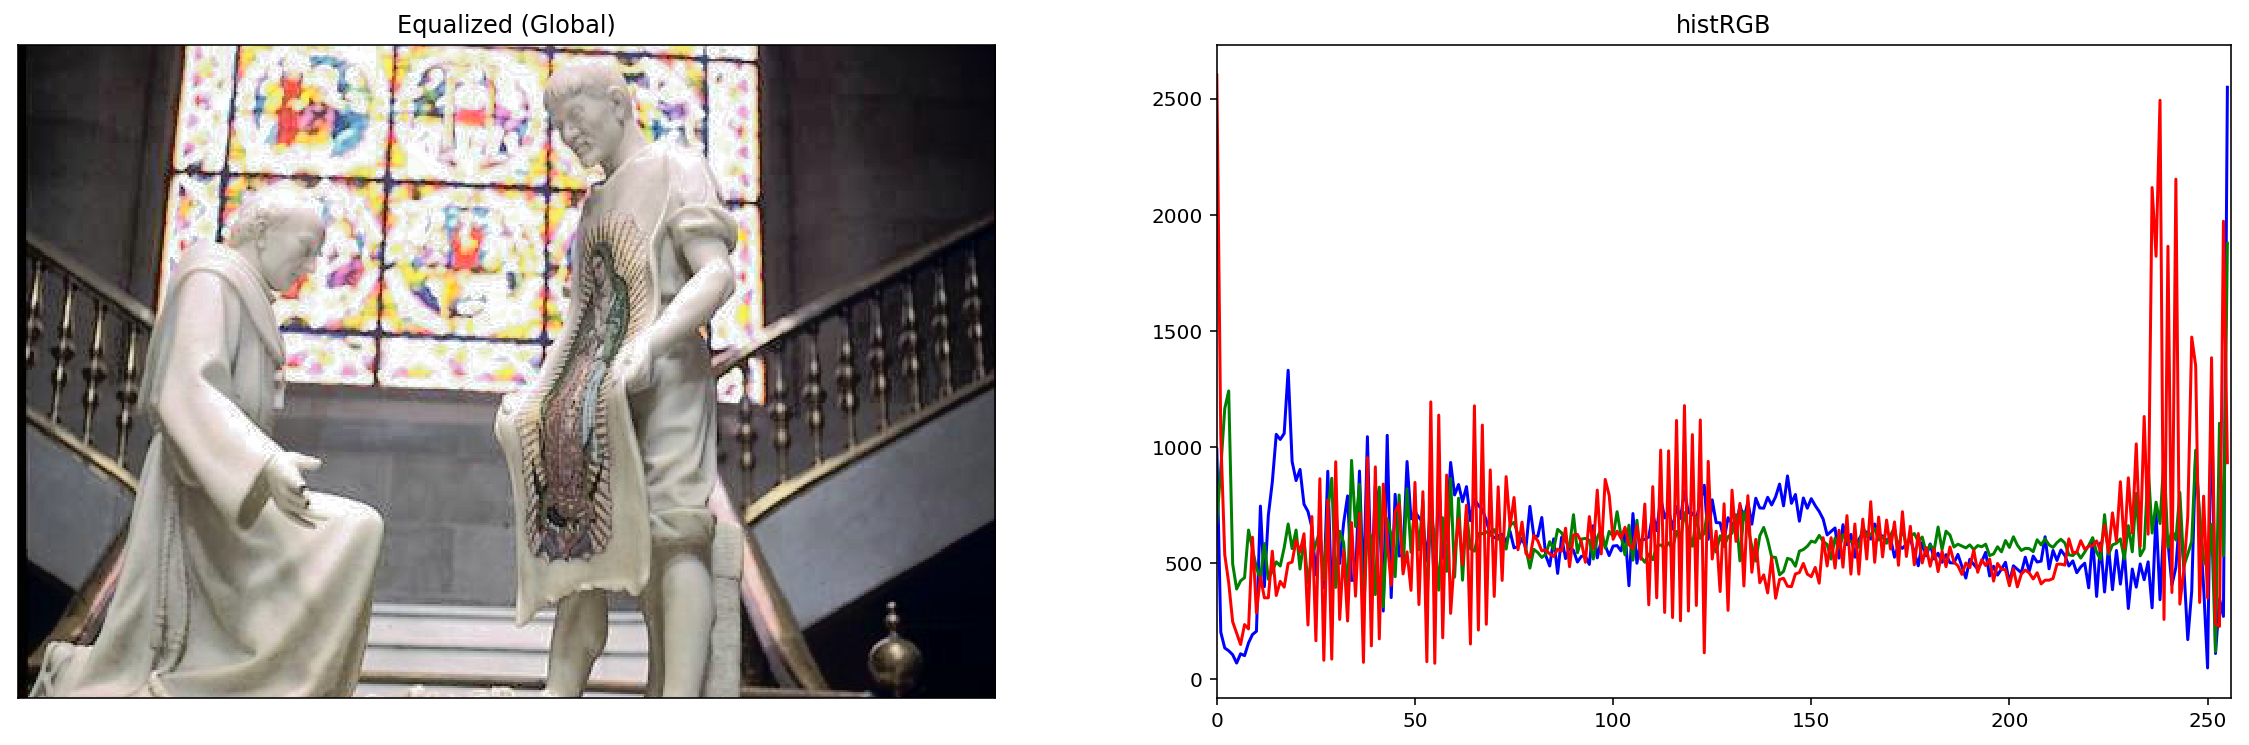

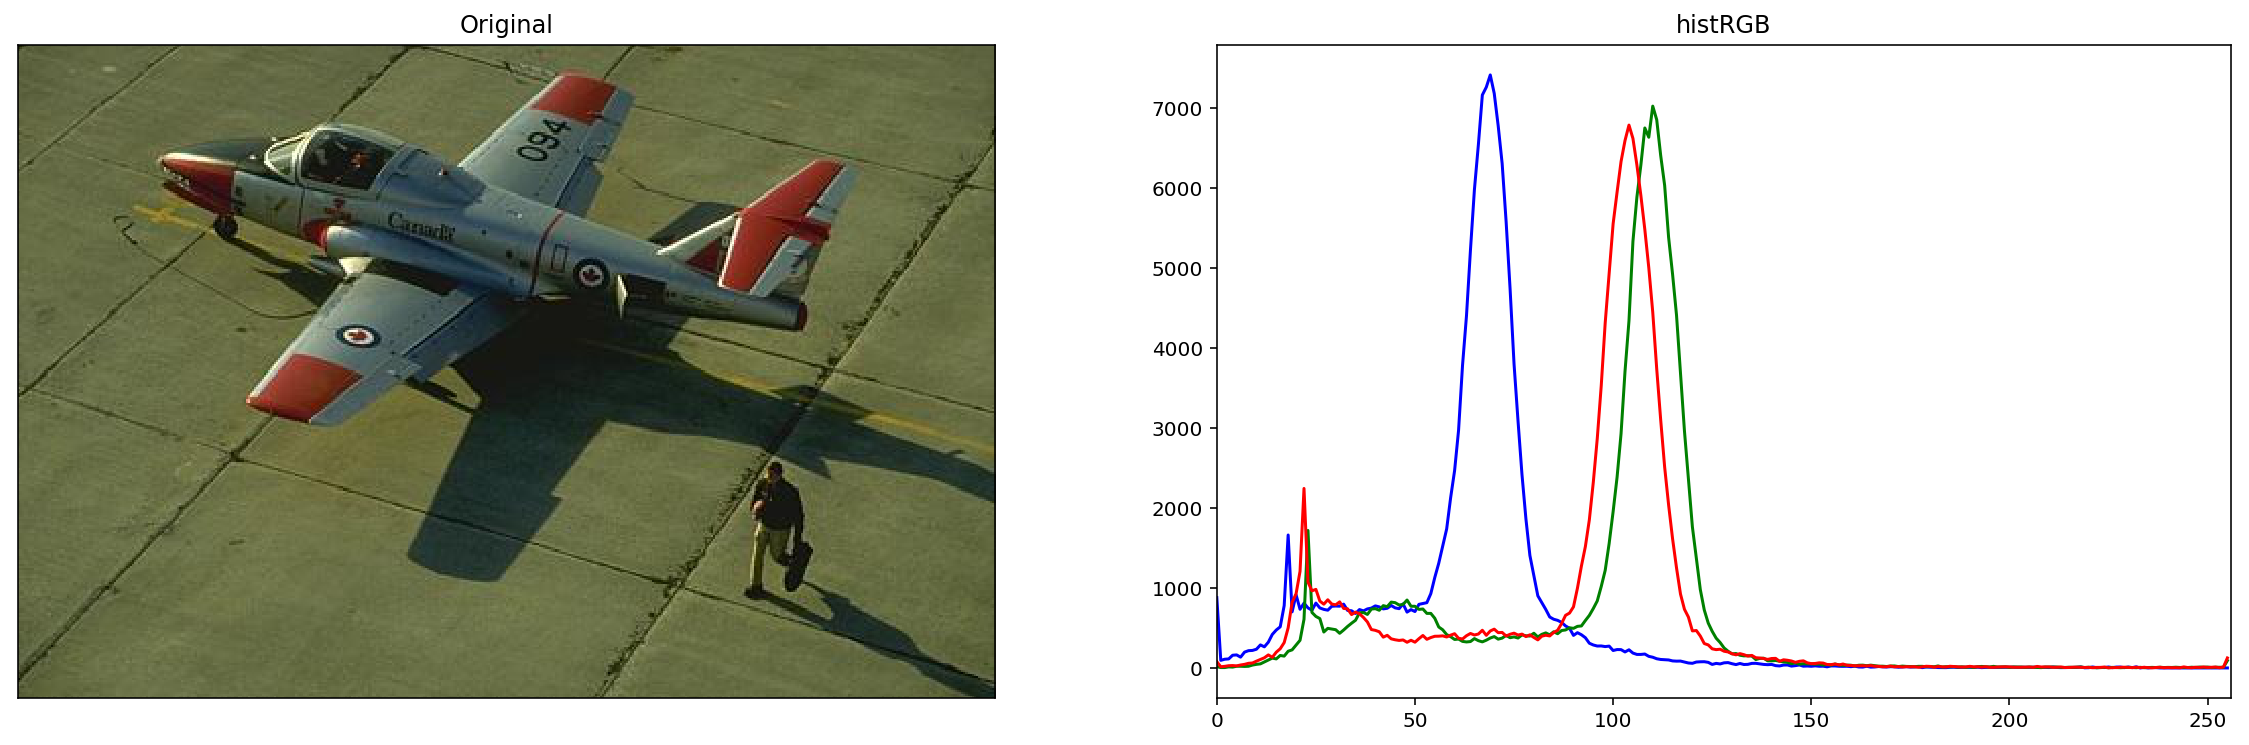

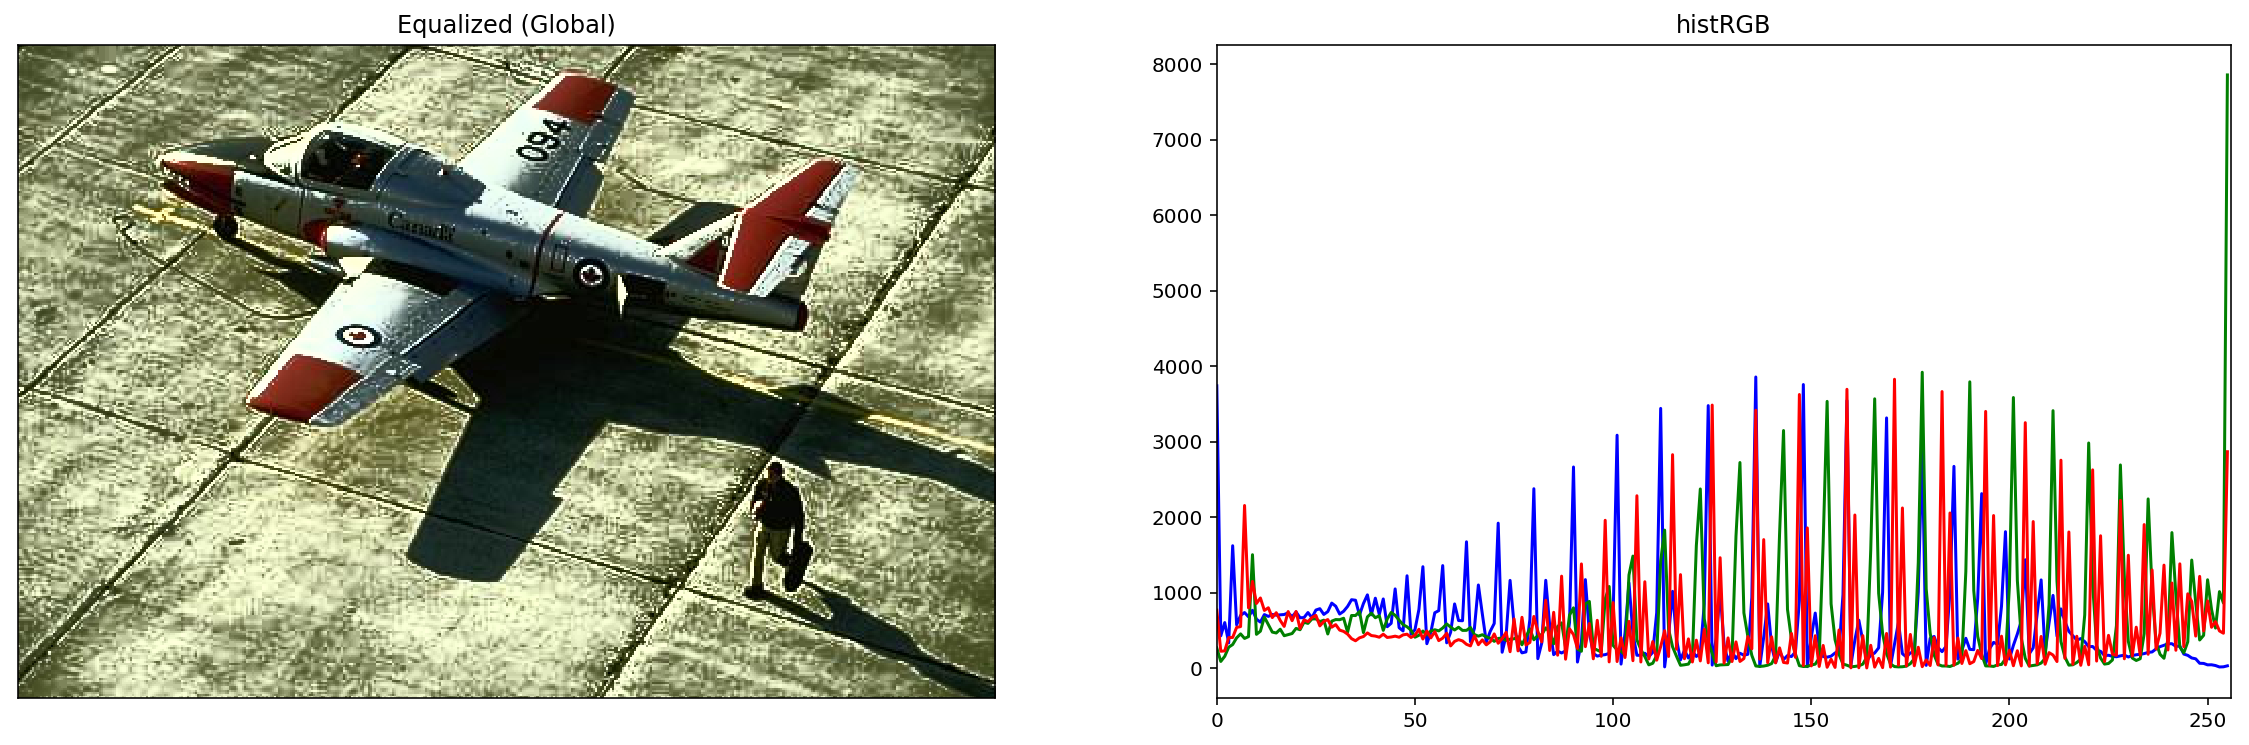

In [126]:
def histogram_equalization(imagepath):
    img = cv2.imread(imagepath)  # Read the image in color
    img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV) # Convert the image to YUV
    img_yuv[:,:,0] = cv2.equalizeHist(img_yuv[:,:,0]) # Apply global histogram equalization on Y channel
    equ = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR) # Convert back to GBR 
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Global)")
    
for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    histogram_equalization(imagepath)


## 2.3 Adaptive Histogram Equalization (CLAHE)

Clip Limit = 40.0
 Grid Size = (8, 8)


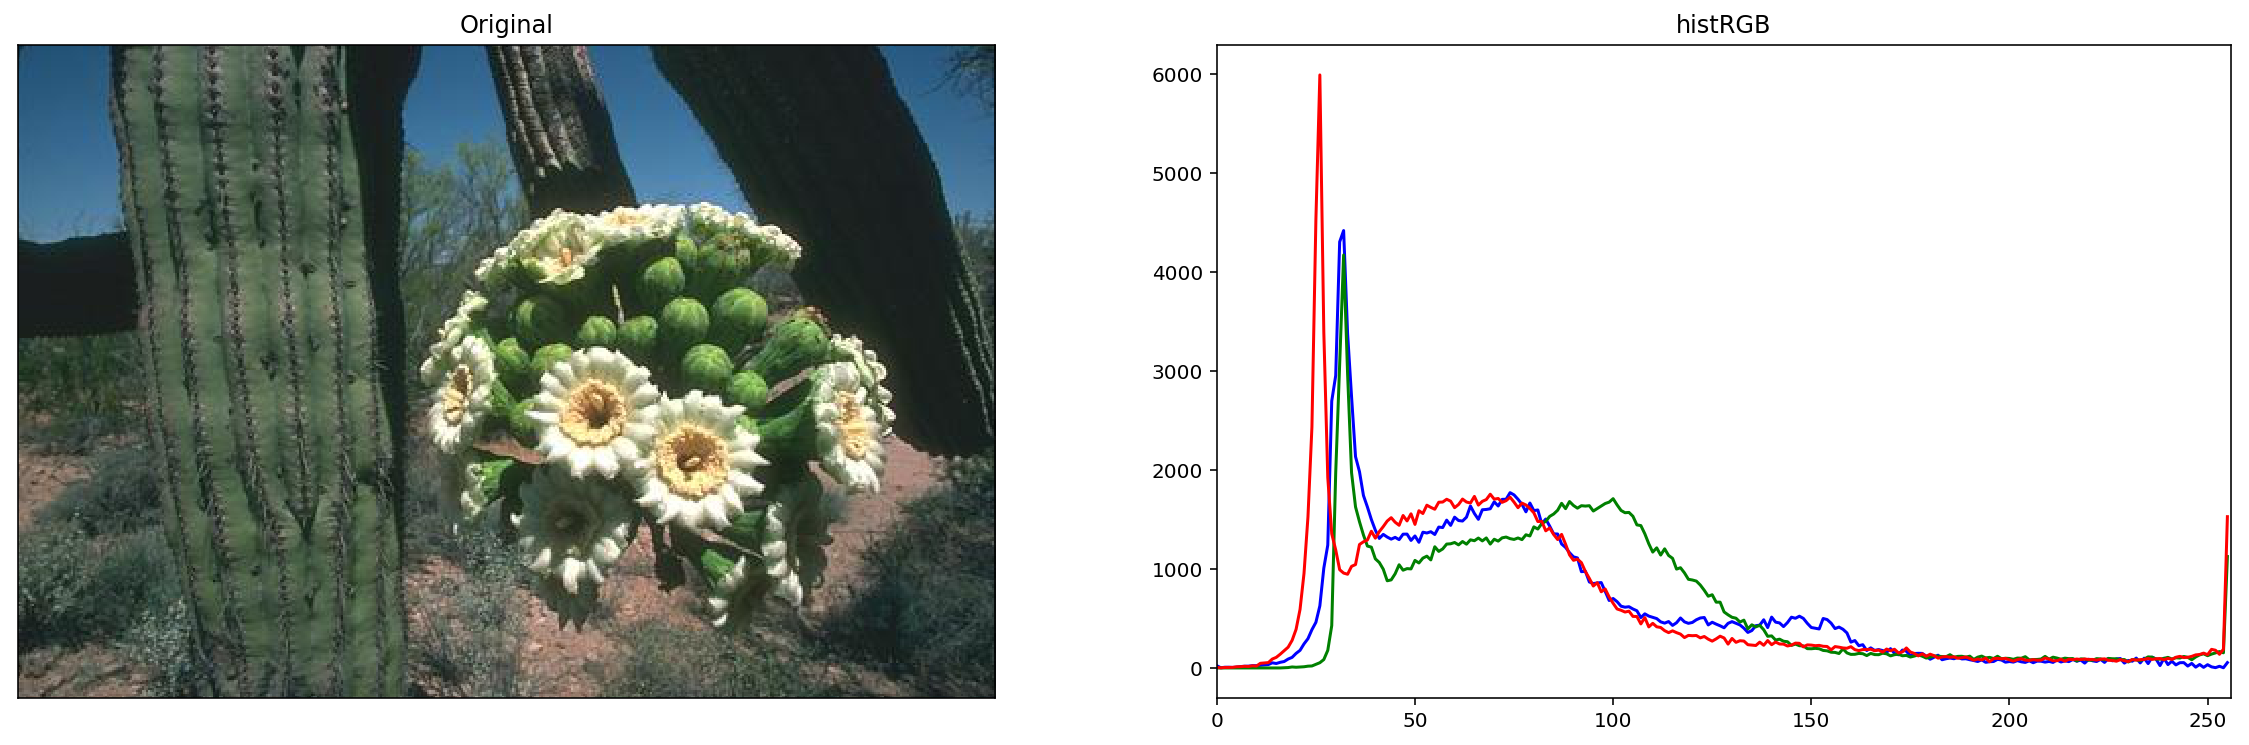

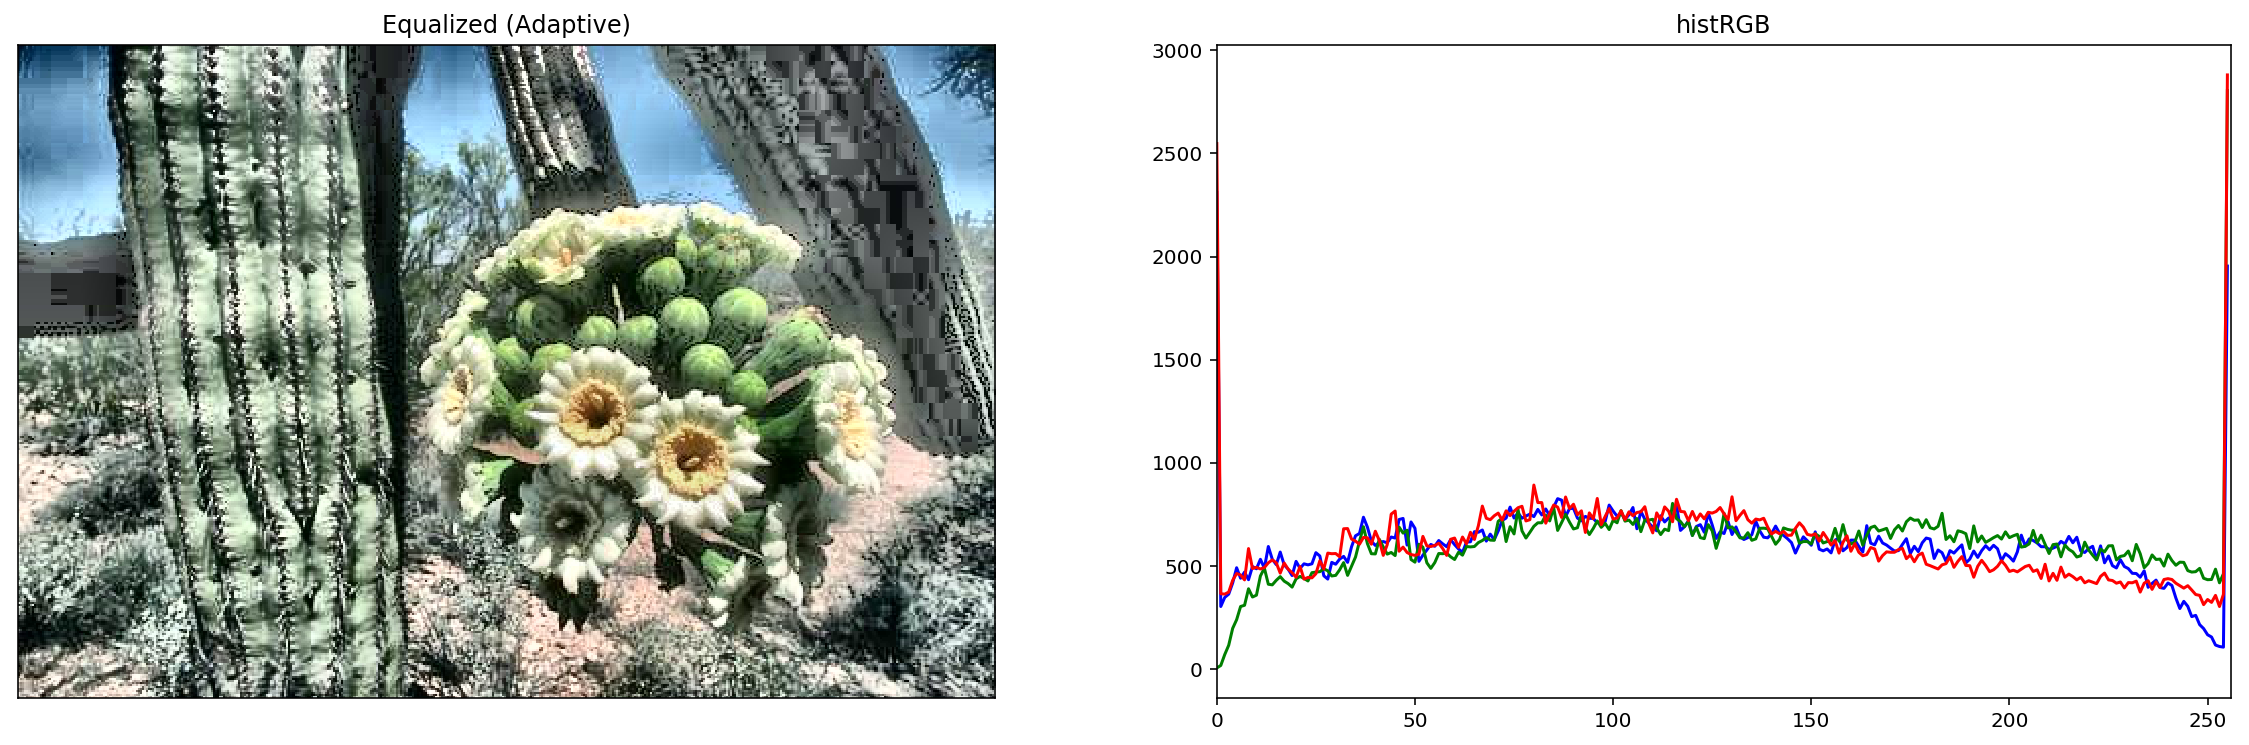

Clip Limit = 40.0
 Grid Size = (8, 8)


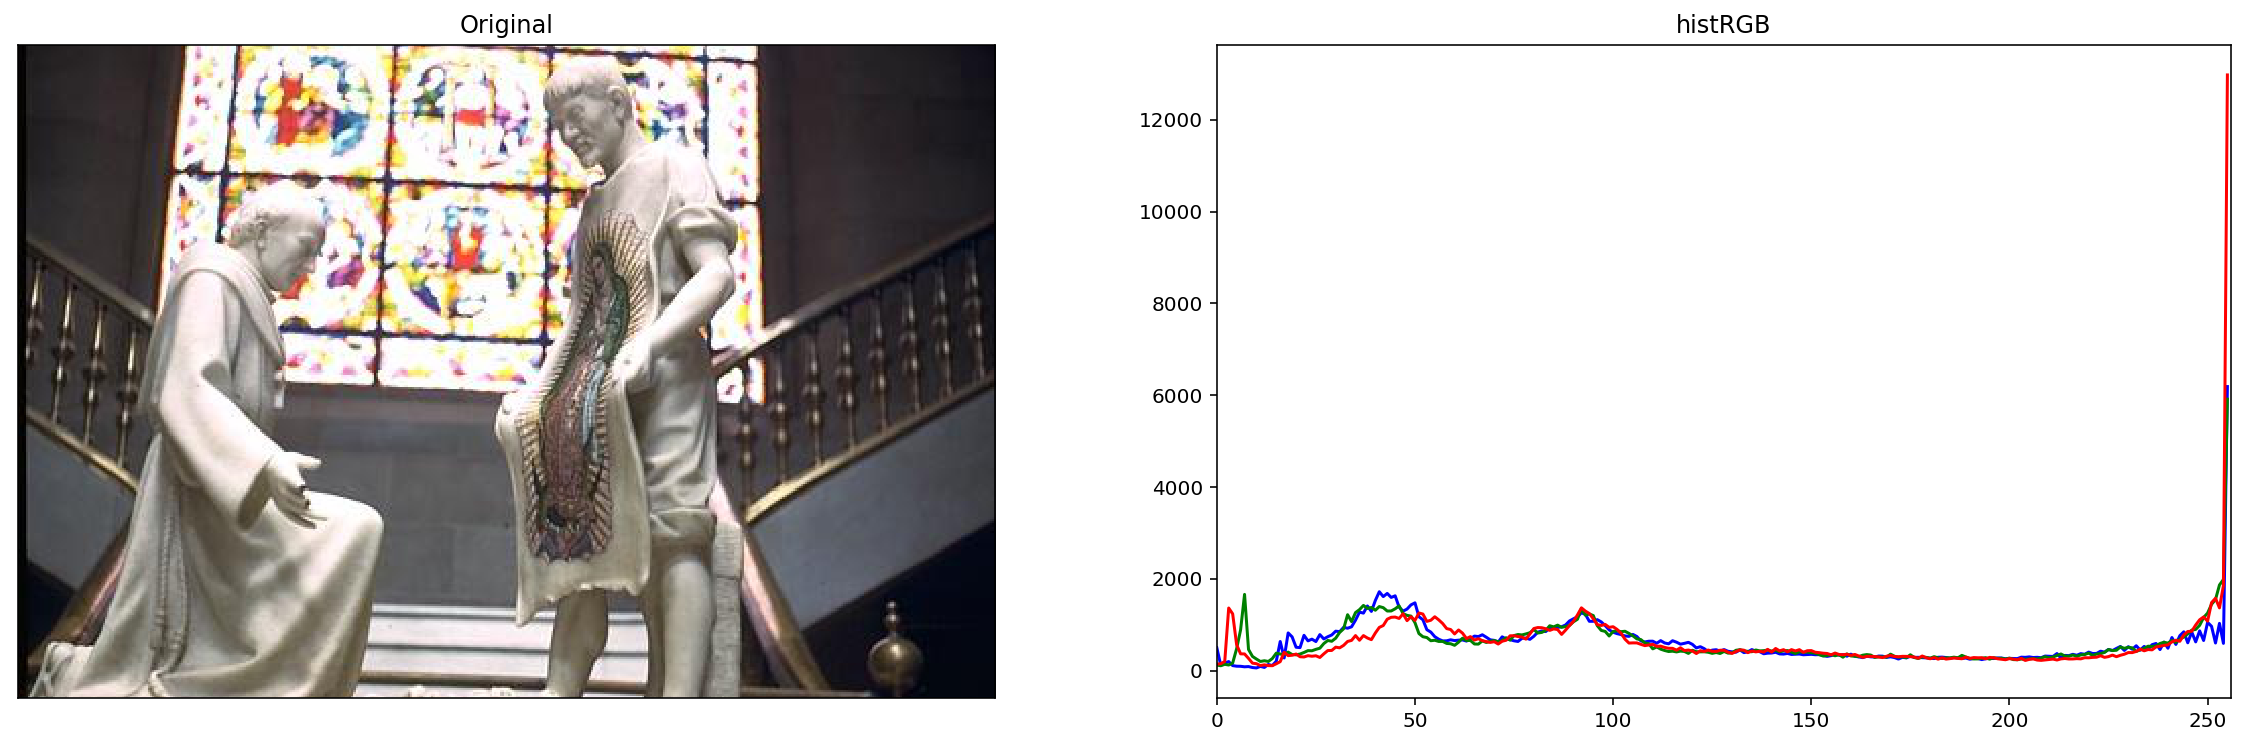

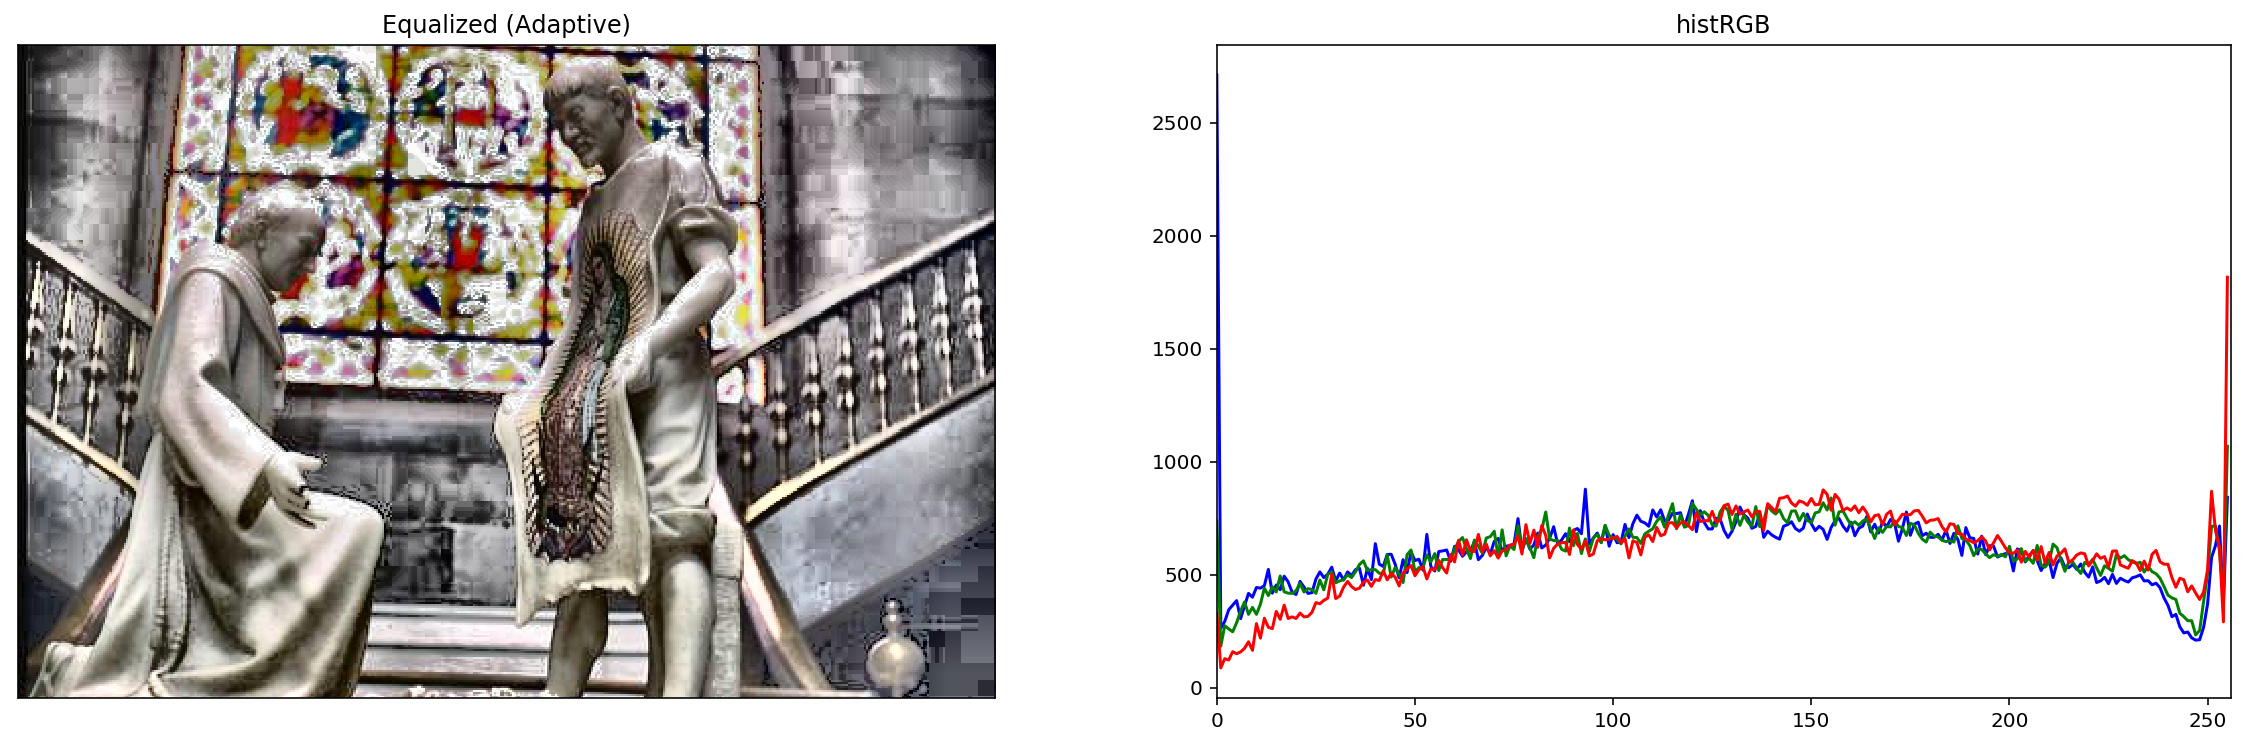

Clip Limit = 40.0
 Grid Size = (8, 8)


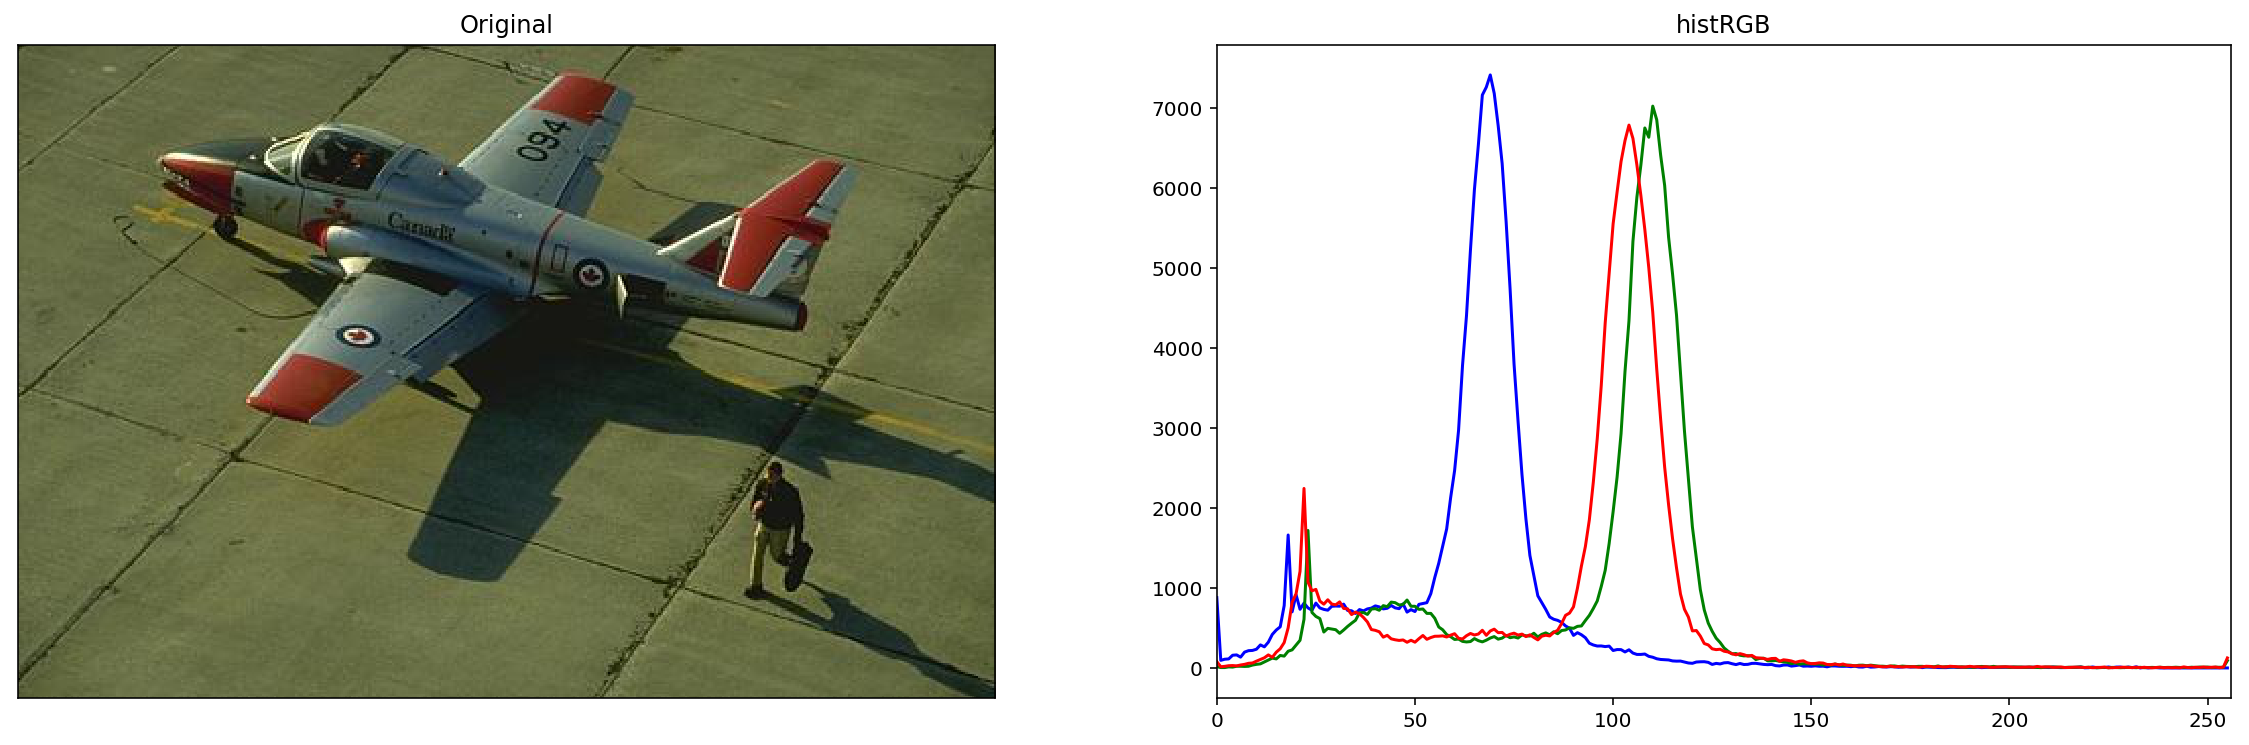

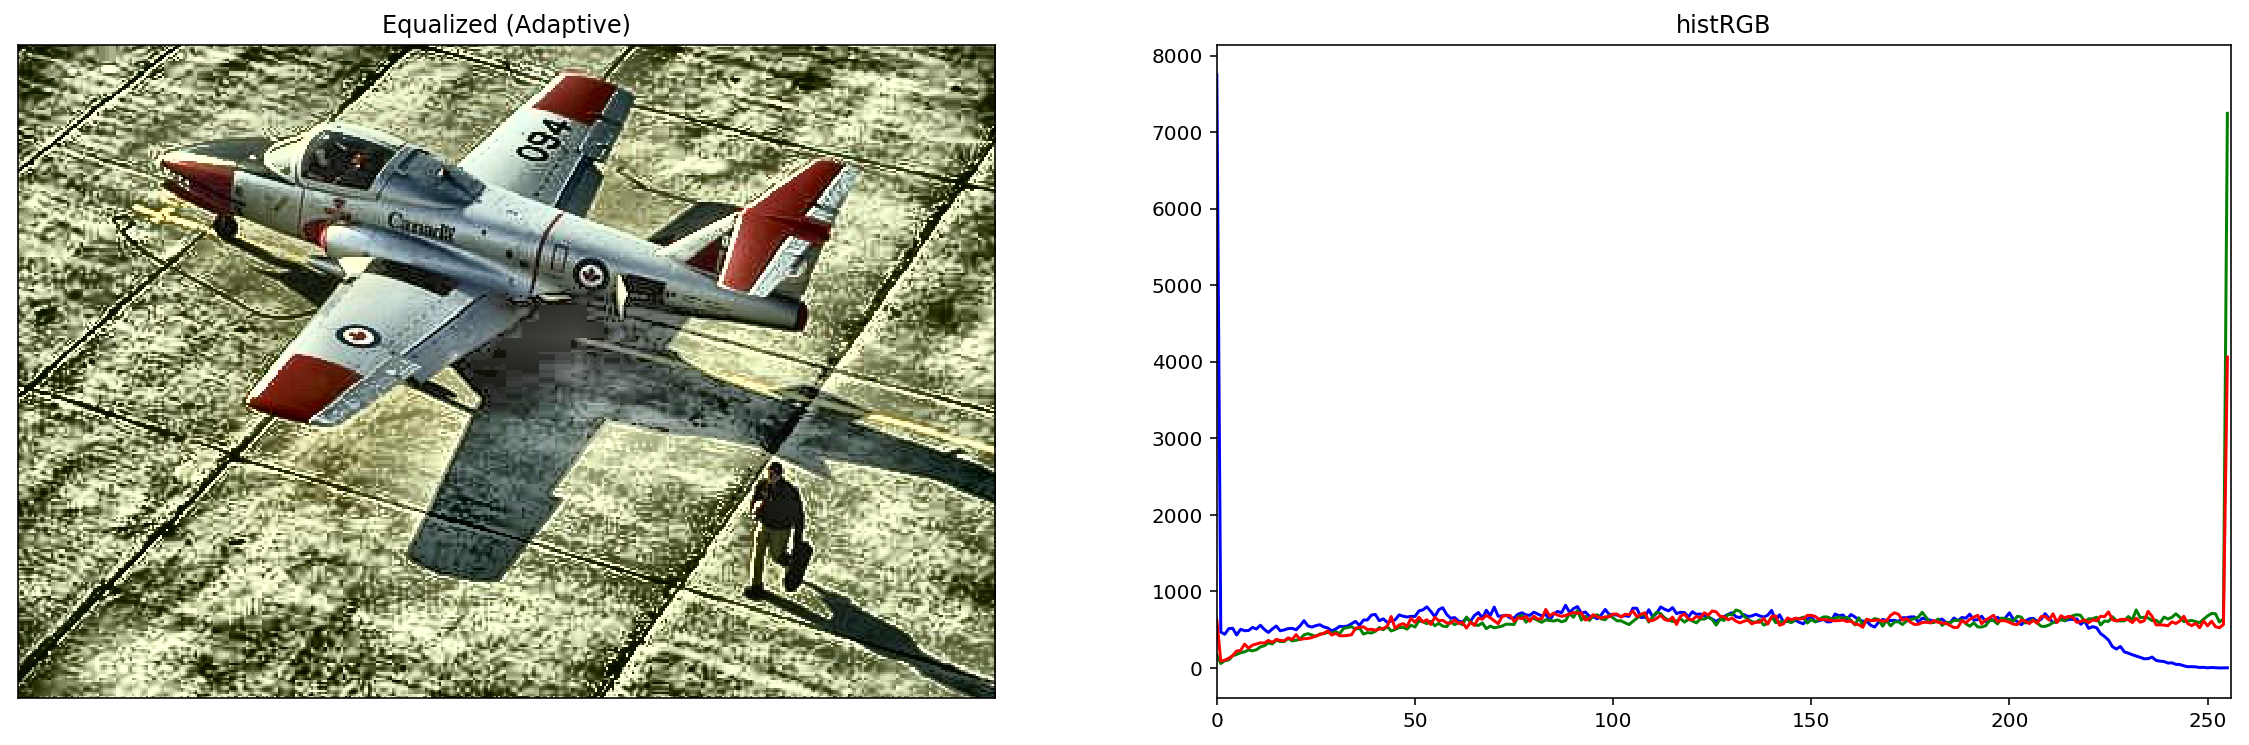

In [127]:
def adaptive_histogram_equalization(imagepath):
    img = cv2.imread(imagepath) # Read the image in color
    img_yuv = cv2.cvtColor(img,cv2.COLOR_BGR2YUV) # Convert the image to YUV
    clahe = cv2.createCLAHE() # a) Create clahe    
    print 'Clip Limit = ' + str(clahe.getClipLimit()) + '\n Grid Size = ' + str(clahe.getTilesGridSize())  # b) Print all the hyper parameters used.
    img_yuv[:,:,0] = clahe.apply(img_yuv[:,:,0]) # c) Apply CLAHE onto the Y channel
    equ = cv2.cvtColor(img_yuv,cv2.COLOR_YUV2BGR) # Convert back to GBR
    show_histRGB(img, "Original")
    show_histRGB(equ, "Equalized (Adaptive)")

for imagename in IMG_NAMES:
    imagepath = os.path.join('data/img/', imagename)
    adaptive_histogram_equalization(imagepath)

###  d) Did you find any difference between the two techniques? (Please briefly answer this question in this block)

Yes there are quite some differences in performing the two techniques <br>

- In the first image we can see that the contrast is a lot better than the original but at the same time it's not too bright unlike when we use Global Histogram Equalization(GHE). The histogram for CLAHE is a lot less noisy than the one for GHE by a big margin.
- In the second image we can see that the sculptures' features are again a lot more crisp after applying CLAHE compared to applying GHE and also that CLAHE does better contrasting. Checking the histogram we see that it is by far less noisy when we use CLAHE than when we use GHE. <br>
- In the third image we can see that even though there is high contrast, the image is lighter as compared to the one with GHE. There is no shadow over the airplane and the airplane's own shadow on the ground is lighter. Again by checking the histograms we can see that there is not much fluctuation in the frequency throughout unlike the GHE  which seems to bevery noisy.<br><br>

<b>So overall, CLAHE performs way better than GHE in terms of increasing the contrast in every image and also helping to reduce the noise.</b>